<a href="https://colab.research.google.com/github/venu-analytics/Analytics-Projects/blob/main/ML_Case_Study_Venugopal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Case Study**

Please use Python for the following. Document your steps and state any assumptions you make. A single
Jupyter notebook file (.ipynb) with your approach and code is sufficient. Make sure it is commented and
easy to follow. If you prefer, you can submit a text document with your analysis too.
The data for the case study comes from the Census Income data set in the UCI Machine Learning
Repository. Your objective is to predict whether income of an individual exceeds $50K/per year based
on census data. More importantly the objective for you is to demonstrate how you tackle a traditional
supervised learning problem.

1) Download the data from the following link http://archive.ics.uci.edu/ml/datasets/Adult into
Python.

2) Read the Attribute Information from the web page. More information can be found in the Data Set Description.

3) Be sure to document your steps and your rationale behind each one of them. This is best done with Jupyter notebook or a word document.

4) Predict the class variable using the given attributes. Use two supervised learning methods. Avoid over-fitting.

5) Assess the performance of your models using appropriate metrics. Discuss which model is best and why.

6) Please provide an explanation in plain English of the business problem you were trying to solve and your analysis of the outcomes. Please add any supporting visualizations to support your explanation.

7) This is intentionally left somewhat open-ended. We want to see how you approach the problem.

**Please Note:** We expect you to approach this business problem with honesty and integrity and rely on
your knowledge of machine learning. Please do not copy from any web-based repository. Candidates
will be disqualified if we notice attempts of plagiarism.

In [38]:
# Let's import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# Let's import the data from UCI Machine learning repo
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Add column names from data description
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Analysing The data

In [8]:
# Checking the unique elements in the income column
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

Let's Create label column as per income column from the dataset.
where:

*   label 1 = income['>50k']
*   label 0 = income['<=50k']



In [10]:
# Creating label column out of income column
data['label'] = np.where(data['income']==' <=50K',0,1)
data = data.drop('income', axis=1)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [19]:
# Checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [22]:
# Checking the statistical insights of numerical data in the dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
# Data shape
data.shape

(32561, 15)

In [13]:
# ratio of label
data.label.value_counts()

0    24720
1     7841
Name: label, dtype: int64

Let's check what percent of people are earning more than $50k in an year.

In [26]:
# what percent of people are earning more than $50k in an year.
lessThan_50k = data[data.label == 0]
greaterThan_50k = data[data.label == 1]

num_lessThan_50k = lessThan_50k.shape[0]
num_greaterThan_50k = greaterThan_50k.shape[0]

print( num_lessThan_50k / (num_lessThan_50k + num_greaterThan_50k)*100, "% of People are earning less than $50k")
print( num_greaterThan_50k / (num_greaterThan_50k + num_lessThan_50k)*100, "% of People are earning greater than $50k")

75.91904425539757 % of People are earning less than $50k
24.080955744602438 % of People are earning greater than $50k


So, 75% of the people are having income less than 50k dollars whereas ~25% of the people are earning more than $50k income in an year. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


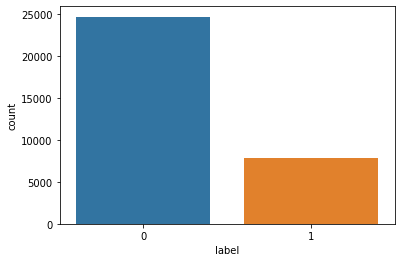

In [17]:
# Visualising the ratio of the label
sb.countplot(data['label'])

Now, analysing the relationship of each variable with respected to label data.

Let's start with age by grouping the ages into 6 bins.

In [23]:
# Grouping the age into 6 bins starting min age of 17 and max age of 90
bins = [17, 30, 40, 50, 60, 70, 120]
labels = ['17-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_range'] = pd.cut(data.age, bins, labels = labels, include_lowest = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


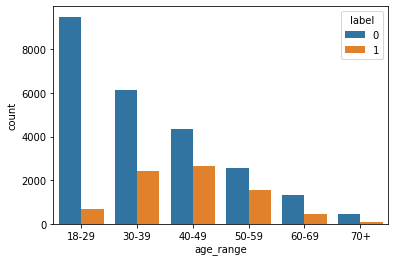

In [28]:
# Visualising the relation between age and label
sb.countplot(data.age_range, hue=data.label)
plt.show()

From the above image we can see that persons belongs to the age group of 30-59 are earning more than $50k and age is an important variable in explaining the label.

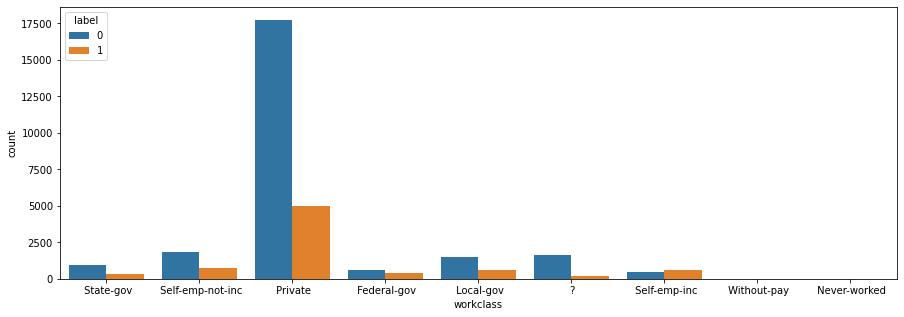

In [41]:
# Visualising the relation between work class and label
dims = (15,5)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='workclass',data=data, hue='label')
plt.show()

From above image we can analyse that the people who are working in private sector are earning more than $50k.

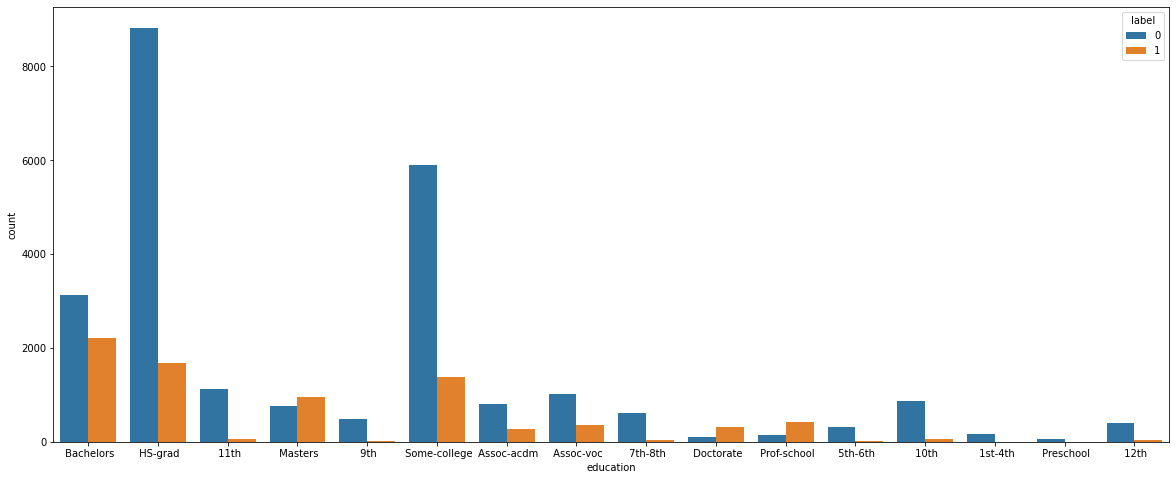

In [45]:
# Visualising the relation between education and label
dims = (20,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='education',data=data, hue='label')
plt.show()

People who are high school graduates and also who has done their bachelors are earning more than $50k.

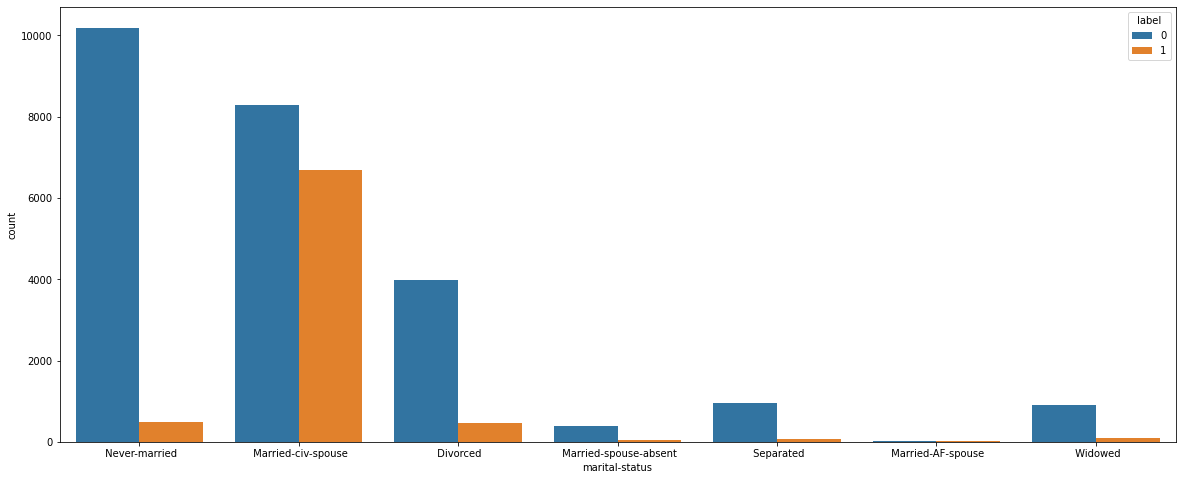

In [46]:
# Visualising the relation between marital-status and label
dims = (20,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='marital-status',data=data, hue='label')
plt.show()

From the above image it is found that the persons who are categorised as Married-civ-spouse are earning more than $50k.